In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from time import perf_counter 

In [9]:
from fonction import *

In [14]:
modifie_angle = False 
modifie_loss = False
batch = 100

In [37]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\train_set\\discontinuity_0_1\\mesh_B\\data_set_p_3_all.csv'

In [38]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(151703, 41)

{'whiskers': [<matplotlib.lines.Line2D at 0x20170078f60>,
 'caps': [<matplotlib.lines.Line2D at 0x20170087908>,
 'boxes': [<matplotlib.lines.Line2D at 0x20170078e10>],
 'medians': [<matplotlib.lines.Line2D at 0x20170087f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x20170087f28>],
 'means': []}

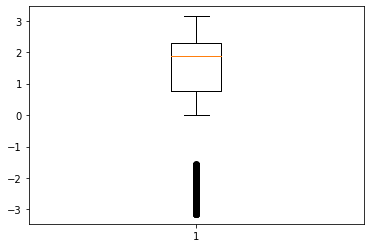

In [28]:
plt.boxplot(data[:,-1])

In [39]:
 X_train, X_test, Y_train, Y_test, indice_neg_data = data_preparation(data,modifie_angle)

In [40]:
np.where(Y_test<0)[0].shape[0]

15763

In [18]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))

 the size of X_train is  (9875, 10)
 the size of X_test is  (2469, 10)
 the size of Y_train is  (9875, 1)
 the size of Y_test is  (2469, 1)


In [19]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(10,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00406: early stopping
========================Summary=============================
all value are in degree 
 the error mean is :  60.48162452407604
 the error std is :  54.47047557869421
 the median is :  42.847213374493236
 the max is :  238.01231161976625
 the min is :  0.0032783794304194203
 the accuracy up to 1    degree is :  1.17  %
 the accuracy up to 5    degree is :  5.63  %
 the accuracy up to 10    degree is :  11.1  %
MSE Train: 1.908 | MSE Test: 2.018 


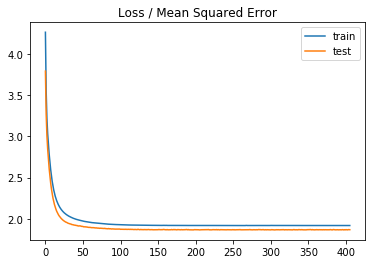

Training time is : 0.35  minute


In [22]:
model_base, train_mse , test_mse,_ = training_NN(build_model_base_line,X_train, X_test, Y_train, Y_test,batch = batch,modifie_loss =modifie_loss )

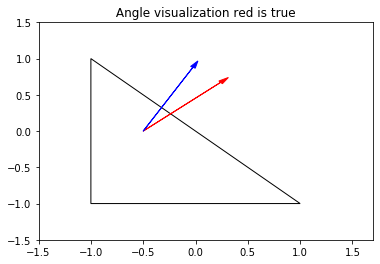

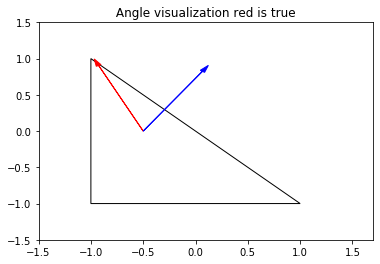

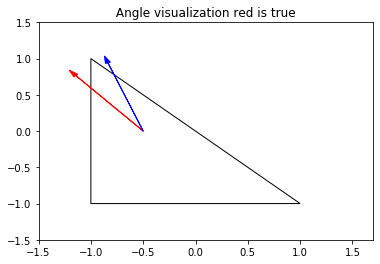

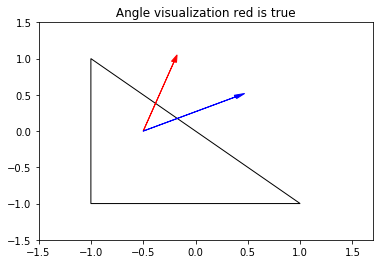

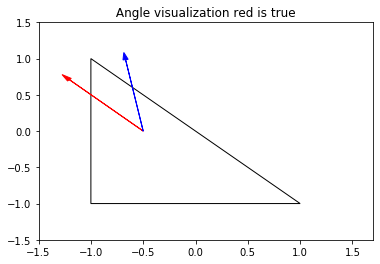

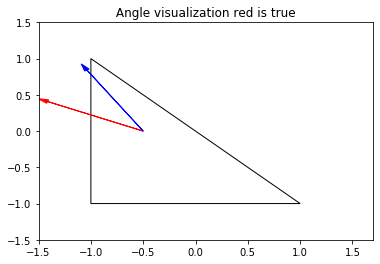

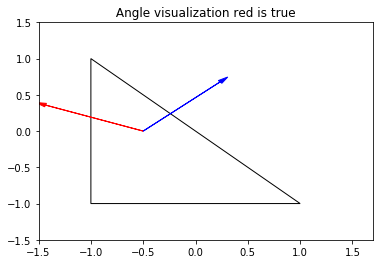

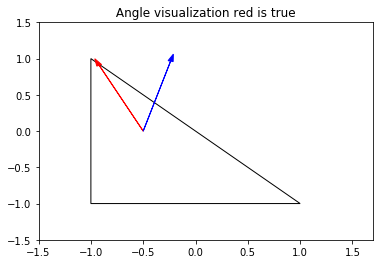

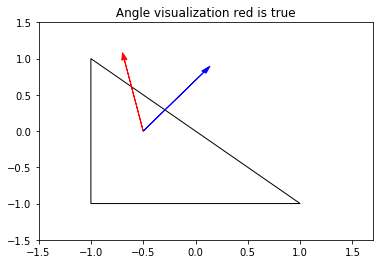

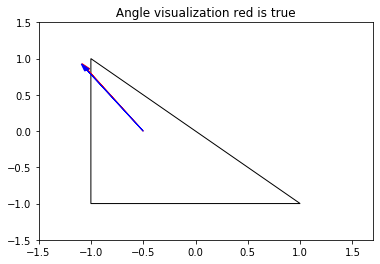

In [23]:
angle_visualization(model_base , X_test , Y_test)

In [24]:
y_hat = model_base.predict(X_test,verbose=0)

In [ ]:
error = y_hat - 

In [11]:
def build_model_3_tanh(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00376: early stopping
MSE Train: 0.276 | MSE Test: 0.282


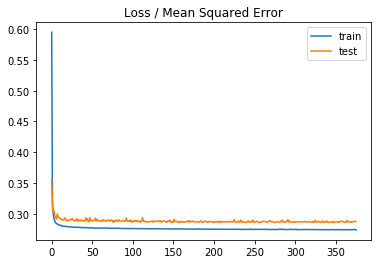

Training time is : 10.79  minute
======================Saving model==========================
Saved model to disk


In [12]:
model_3_tanh, train_mse , test_mse = training_NN(build_model_3_tanh,X_train, X_test, Y_train, Y_test,)

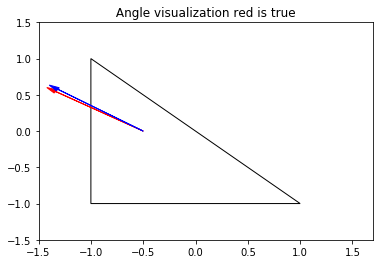

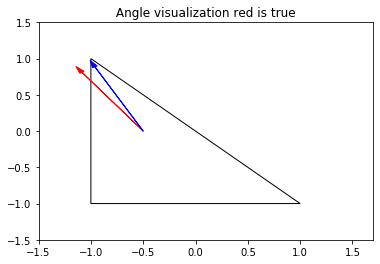

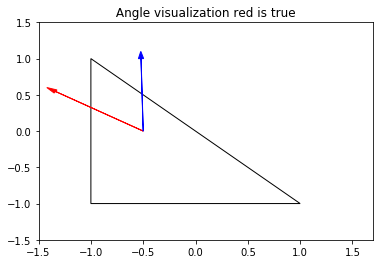

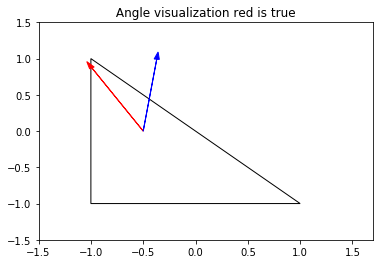

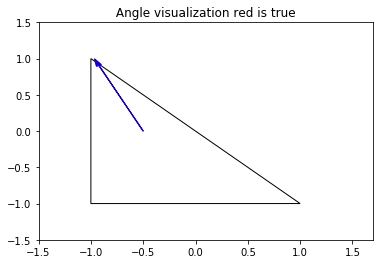

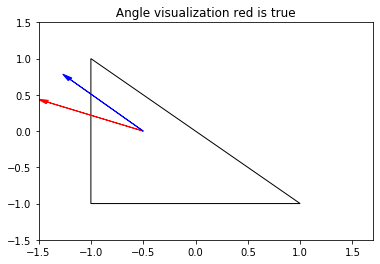

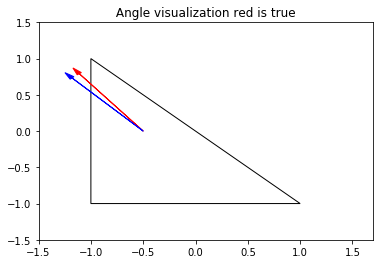

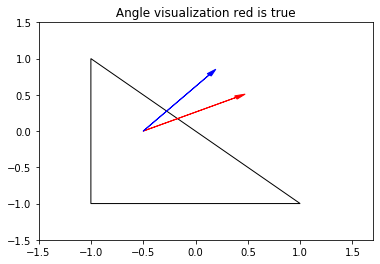

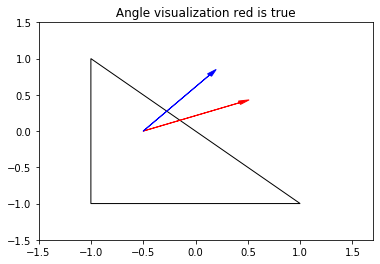

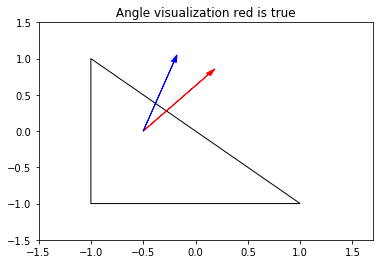

In [13]:
angle_visualization(model_3_tanh , X_test , Y_test)

We can see here that bad prediction such as the 10 , 5 plot correspond to triangle that has the discontinuty in a corner 

In [15]:
X_test[9,:]

array([-0.57143, -0.57143, -0.57143, -0.57143, -0.57143, -0.57143,
       -0.57143, -0.57143, -0.57143,  1.4286 ])

In [16]:
X_test[4,:]

array([ 1.7143,  1.7143,  1.7143,  1.7143,  1.7143,  1.7143,  1.7143,
        1.7143,  1.7143, -2.    ])

In [17]:
X_test[0,:]

array([ 0.,  0., -2., -2.,  0.,  0.,  0.,  0.,  0.,  0.])

### Making prediction :

In [14]:
data_path_test = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\data_test_set_1.csv'

In [15]:
test_mse = prediction_on_new_grid(data_path_test,'\data\pred_data_set_1_01.csv',model_3_tanh)

loading data ... 
loading succed
on a new mesh the mse is : 0.0782
saving prediction ...
saving succed
